In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime
from scipy.stats import linregress

In [16]:
qld_data = pd.read_csv("data/qld_cattle_counts.csv")
qld_data.head()

,Unnamed: 0,Year,Queensland
0,14,1976,11036.0
1,15,1977,10856.0
2,16,1978,10261.0
3,17,1979,9756.0
4,18,1980,9359.0


In [17]:
qld_data.columns.to_list()

['Unnamed: 0', 'Year', 'Queensland']

In [18]:
qld_cattle_final = qld_data[["Year", "Queensland"]]
qld_cattle_final.head()

,Year,Queensland
0,1976,11036.0
1,1977,10856.0
2,1978,10261.0
3,1979,9756.0
4,1980,9359.0


In [19]:
 qld_cattle_final.dtypes

Year            int64
Queensland    float64
dtype: object

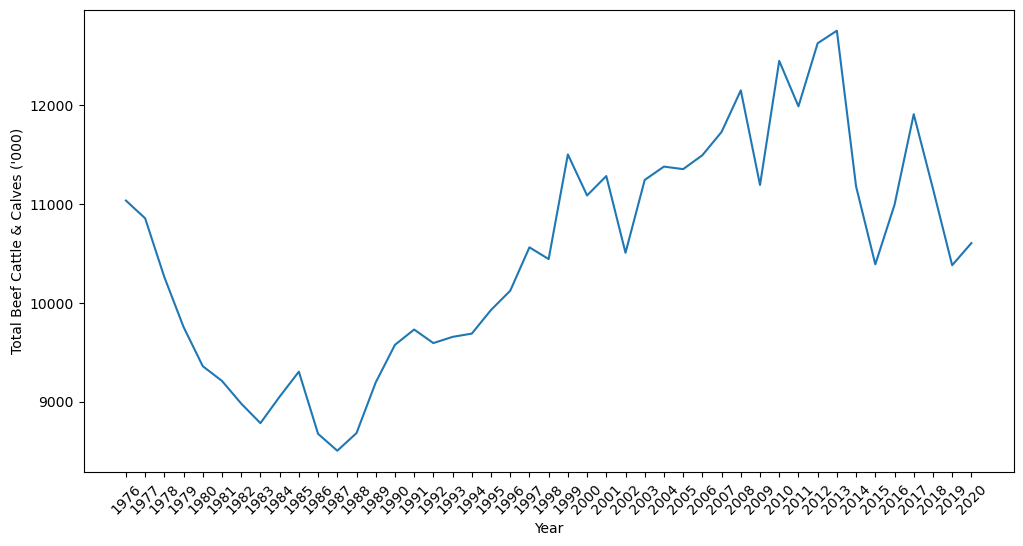

In [20]:
x_values = qld_cattle_final["Year"]
y_values = qld_cattle_final["Queensland"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values)
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Beef Cattle & Calves ('000)")
plt.savefig("QLD_cattle_base.png")
plt.show()

In [43]:
all_flood_data = pd.read_csv("data/anna_flooddata.csv")
all_flood_data

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990-01-01,Brisbane,-27.5000,153.0000,28.6,18.3,22.5,0.0,0.0,14.1,33.20
1,1990-01-02,Brisbane,-27.5000,153.0000,29.3,17.0,22.9,0.0,0.0,13.4,31.58
2,1990-01-03,Brisbane,-27.5000,153.0000,30.8,19.3,24.1,0.0,0.0,13.1,30.41
3,1990-01-04,Brisbane,-27.5000,153.0000,35.5,18.5,26.0,0.0,0.0,16.8,29.48
4,1990-01-05,Brisbane,-27.5000,153.0000,27.4,22.0,24.3,0.0,0.0,19.4,28.85
...,...,...,...,...,...,...,...,...,...,...,...
45291,2020-12-28,Ayr,-19.5739,147.4067,28.3,24.9,26.4,6.9,20.0,22.1,0.50
45292,2020-12-29,Ayr,-19.5739,147.4067,26.0,24.1,24.8,28.9,24.0,17.2,0.78
45293,2020-12-30,Ayr,-19.5739,147.4067,26.5,24.2,25.0,34.7,24.0,14.3,1.70
45294,2020-12-31,Ayr,-19.5739,147.4067,27.1,23.1,24.6,49.7,21.0,16.1,3.08


In [44]:
all_flood_data["date"] = all_flood_data["date"].astype("datetime64[ns]")

In [45]:
all_flood_data['Year'] = all_flood_data["date"].dt.strftime("%Y")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge,Year
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,33.20,1990
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,31.58,1990
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,30.41,1990
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,29.48,1990
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,28.85,1990


In [46]:
all_flood_data_yearly = all_flood_data.groupby("Year").mean(numeric_only=True)
all_flood_data_yearly

,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
Year,,,,,,,,,
1990,-22.5283,149.581175,26.461233,18.555411,22.119932,3.340959,3.267808,17.824658,202.321500
1991,-22.5283,149.581175,26.890685,18.683699,22.419452,2.246575,2.855479,17.027740,468.477342
1992,-22.5283,149.581175,26.810656,18.896516,22.471038,1.644604,2.459016,16.909836,26.387671
1993,-22.5283,149.581175,26.690342,19.052055,22.483014,1.141301,2.364384,17.638699,9.648863
1994,-22.5283,149.581175,26.849178,18.464247,22.238493,1.168493,2.110959,18.095548,15.456911
1995,-22.5283,149.581175,26.960685,19.091918,22.610753,1.715068,2.675342,17.691164,28.288390
1996,-22.5283,149.581175,26.812910,18.758538,22.408402,2.202049,3.820355,17.679986,47.271796
1997,-22.5283,149.581175,26.434452,18.860685,22.290411,2.050753,2.915068,17.507945,140.364521
1998,-22.5283,149.581175,26.827397,19.740959,22.943151,2.622192,3.947945,17.156849,167.845918


In [47]:
all_flood_data_yearly.reset_index(inplace=True)
all_flood_data_yearly.head()

,Year,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990,-22.5283,149.581175,26.461233,18.555411,22.119932,3.340959,3.267808,17.824658,202.321500
1,1991,-22.5283,149.581175,26.890685,18.683699,22.419452,2.246575,2.855479,17.027740,468.477342
2,1992,-22.5283,149.581175,26.810656,18.896516,22.471038,1.644604,2.459016,16.909836,26.387671
3,1993,-22.5283,149.581175,26.690342,19.052055,22.483014,1.141301,2.364384,17.638699,9.648863
4,1994,-22.5283,149.581175,26.849178,18.464247,22.238493,1.168493,2.110959,18.095548,15.456911


In [49]:
all_qld_av_discharge = all_flood_data_yearly[["Year", "river_discharge"]]
all_qld_av_discharge

,Year,river_discharge
0,1990,202.321500
1,1991,468.477342
2,1992,26.387671
3,1993,9.648863
4,1994,15.456911
5,1995,28.288390
6,1996,47.271796
7,1997,140.364521
8,1998,167.845918
9,1999,88.784760


In [50]:
all_qld_av_discharge.dtypes

Year                object
river_discharge    float64
dtype: object

In [54]:
all_qld_av_discharge=all_qld_av_discharge.apply(pd.to_numeric, errors="coerce")

In [55]:
all_qld_av_discharge

,Year,river_discharge
0,1990,202.321500
1,1991,468.477342
2,1992,26.387671
3,1993,9.648863
4,1994,15.456911
5,1995,28.288390
6,1996,47.271796
7,1997,140.364521
8,1998,167.845918
9,1999,88.784760


In [56]:
all_qld_av_discharge.dtypes

Year                 int64
river_discharge    float64
dtype: object

In [57]:
all_herd_vs_discharge = pd.merge(all_qld_av_discharge, qld_cattle_final, on="Year", how="left" )
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,202.321500,9575.20
1,1991,468.477342,9730.40
2,1992,26.387671,9593.20
3,1993,9.648863,9656.10
4,1994,15.456911,9689.10
5,1995,28.288390,9928.30
6,1996,47.271796,10123.00
7,1997,140.364521,10562.30
8,1998,167.845918,10443.60
9,1999,88.784760,11502.60


In [59]:
all_herd_vs_discharge.dropna(how="any", inplace=True)
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,202.321500,9575.20
1,1991,468.477342,9730.40
2,1992,26.387671,9593.20
3,1993,9.648863,9656.10
4,1994,15.456911,9689.10
5,1995,28.288390,9928.30
6,1996,47.271796,10123.00
7,1997,140.364521,10562.30
8,1998,167.845918,10443.60
9,1999,88.784760,11502.60


In [60]:
all_herd_vs_discharge.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_discharge

,Year,river_discharge,Herd Size
0,1990,202.321500,9575.20
1,1991,468.477342,9730.40
2,1992,26.387671,9593.20
3,1993,9.648863,9656.10
4,1994,15.456911,9689.10
5,1995,28.288390,9928.30
6,1996,47.271796,10123.00
7,1997,140.364521,10562.30
8,1998,167.845918,10443.60
9,1999,88.784760,11502.60


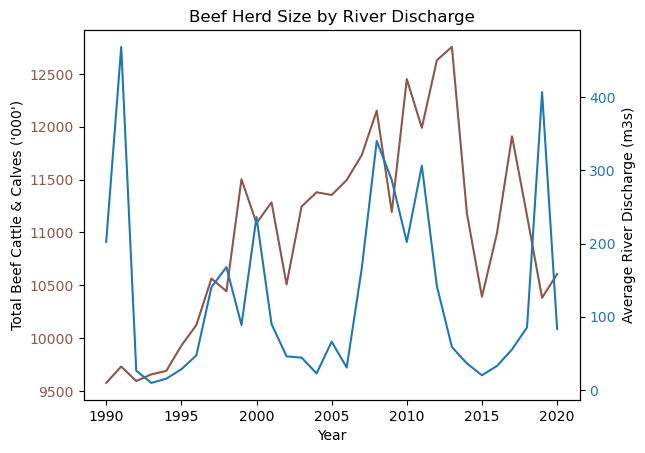

In [86]:
all_x_values = all_herd_vs_discharge["Year"]
all_y_values_1 = all_herd_vs_discharge["Herd Size"]
all_y_values_2 = all_herd_vs_discharge["river_discharge"]


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000')")
ax1.plot(all_x_values, all_y_values_1, color="tab:brown")
ax1.tick_params(axis="y", labelcolor="tab:brown")

ax2 = ax1.twinx()

ax2.set_ylabel("Average River Discharge (m3s)")
ax2.plot(all_x_values, all_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Beef Herd Size by River Discharge")
# plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.savefig("../Anna Outputs/BRB-TWV-RCH-AYR_flood.png")

fig.tight_layout()
plt.show()


In [75]:
all_qld_av_rain = all_flood_data_yearly[["Year", "precipitation_sum"]]
all_qld_av_rain

,Year,precipitation_sum
0,1990,3.340959
1,1991,2.246575
2,1992,1.644604
3,1993,1.141301
4,1994,1.168493
5,1995,1.715068
6,1996,2.202049
7,1997,2.050753
8,1998,2.622192
9,1999,2.484795


In [77]:
all_qld_av_rain.dtypes

Year                  object
precipitation_sum    float64
dtype: object

In [78]:
all_qld_av_rain=all_qld_av_rain.apply(pd.to_numeric, errors="coerce")

In [79]:
all_herd_vs_rain = pd.merge(all_qld_av_rain, qld_cattle_final, on="Year", how="left" )
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.340959,9575.20
1,1991,2.246575,9730.40
2,1992,1.644604,9593.20
3,1993,1.141301,9656.10
4,1994,1.168493,9689.10
5,1995,1.715068,9928.30
6,1996,2.202049,10123.00
7,1997,2.050753,10562.30
8,1998,2.622192,10443.60
9,1999,2.484795,11502.60


In [80]:
all_herd_vs_rain.dropna(how="any", inplace=True)
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.340959,9575.20
1,1991,2.246575,9730.40
2,1992,1.644604,9593.20
3,1993,1.141301,9656.10
4,1994,1.168493,9689.10
5,1995,1.715068,9928.30
6,1996,2.202049,10123.00
7,1997,2.050753,10562.30
8,1998,2.622192,10443.60
9,1999,2.484795,11502.60


In [81]:
all_herd_vs_rain.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_rain

,Year,precipitation_sum,Herd Size
0,1990,3.340959,9575.20
1,1991,2.246575,9730.40
2,1992,1.644604,9593.20
3,1993,1.141301,9656.10
4,1994,1.168493,9689.10
5,1995,1.715068,9928.30
6,1996,2.202049,10123.00
7,1997,2.050753,10562.30
8,1998,2.622192,10443.60
9,1999,2.484795,11502.60


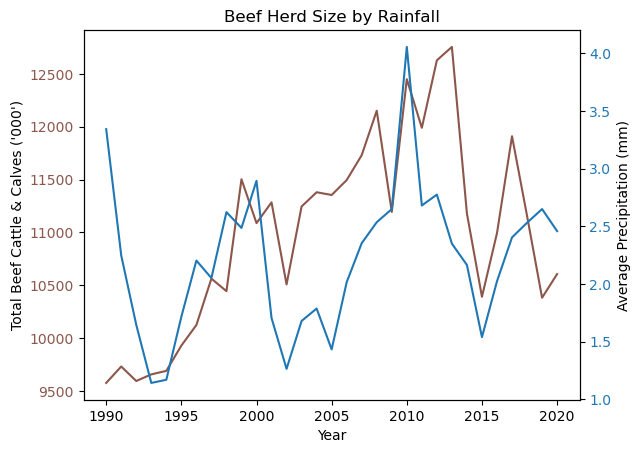

In [85]:
rain_x_values = all_herd_vs_rain["Year"]
rain_y_values_1 = all_herd_vs_rain["Herd Size"]
rain_y_values_2 = all_herd_vs_rain["precipitation_sum"]


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000')")
ax1.plot(rain_x_values, rain_y_values_1, color="tab:brown")
ax1.tick_params(axis="y", labelcolor="tab:brown")

ax2 = ax1.twinx()

ax2.set_ylabel("Average Precipitation (mm)")
ax2.plot(rain_x_values, rain_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Beef Herd Size by Rainfall")

# plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.savefig("../Anna Outputs/BRB-TWV-RCH-AYR_rain.png")

fig.tight_layout()
plt.show()